In [64]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt



In [65]:
df=pd.read_csv("teams.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2144 entries, 0 to 2143
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   team           2144 non-null   object 
 1   country        2144 non-null   object 
 2   year           2144 non-null   int64  
 3   events         2144 non-null   int64  
 4   athletes       2144 non-null   int64  
 5   age            2144 non-null   float64
 6   height         2144 non-null   float64
 7   weight         2144 non-null   float64
 8   medals         2144 non-null   int64  
 9   prev_medals    2014 non-null   float64
 10  prev_3_medals  2014 non-null   float64
dtypes: float64(5), int64(4), object(2)
memory usage: 184.4+ KB


In [66]:
df.head()

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0


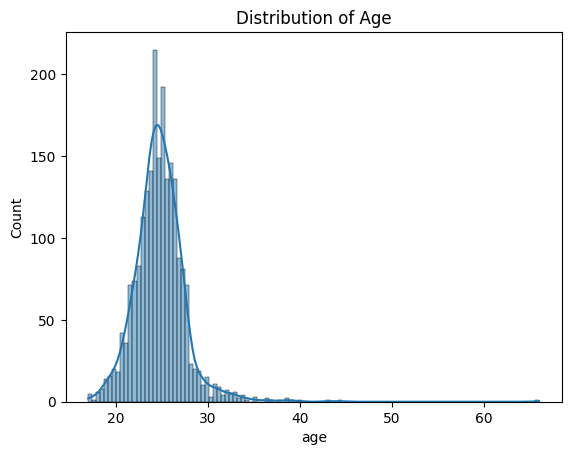

In [67]:
sns.histplot(df['age'], kde=True)  # Histogram for age with a kernel density estimate
plt.title('Distribution of Age')
plt.show()

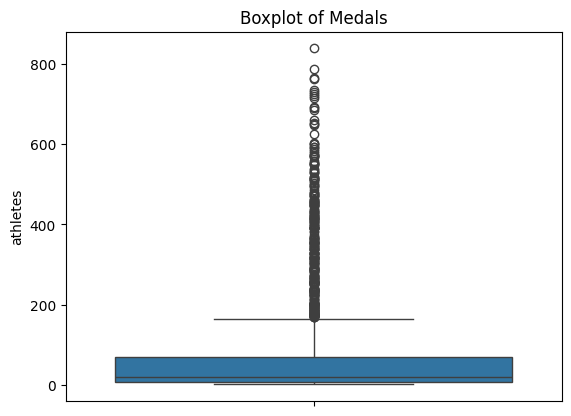

In [68]:
sns.boxplot(y=df['athletes'])
plt.title('Boxplot of Medals')
plt.show()


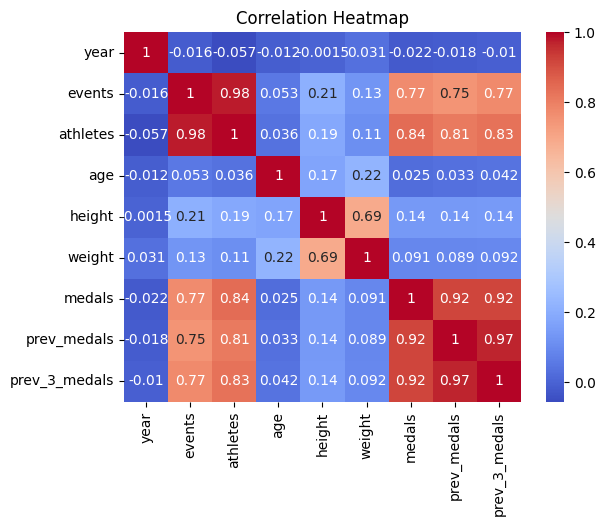

In [69]:
numeric_df = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()


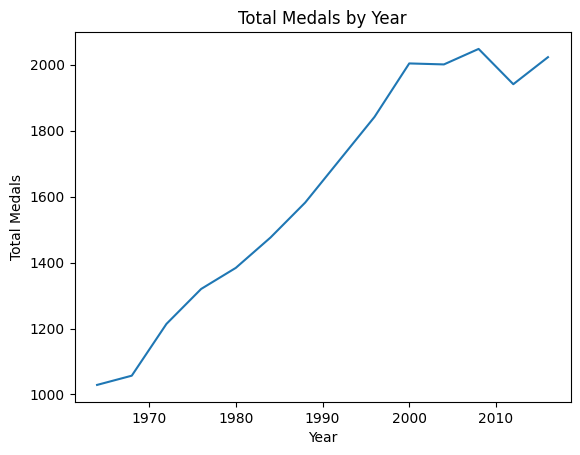

In [70]:
df.groupby('year')['medals'].sum().plot(kind='line')
plt.title('Total Medals by Year')
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.show()


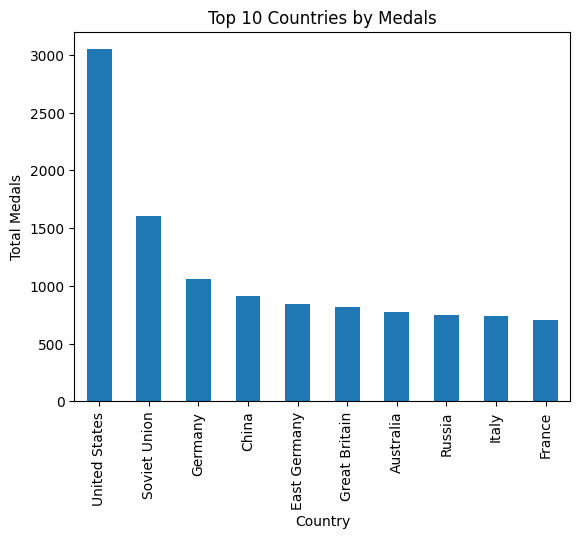

In [71]:
country_medals = df.groupby('country')['medals'].sum().sort_values(ascending=False)
country_medals.head(10).plot(kind='bar')
plt.title('Top 10 Countries by Medals')
plt.xlabel('Country')
plt.ylabel('Total Medals')
plt.show()


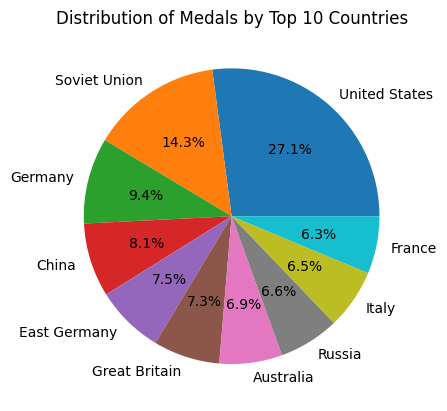

In [72]:
country_medals.head(10).plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Medals by Top 10 Countries')
plt.ylabel('')
plt.show()


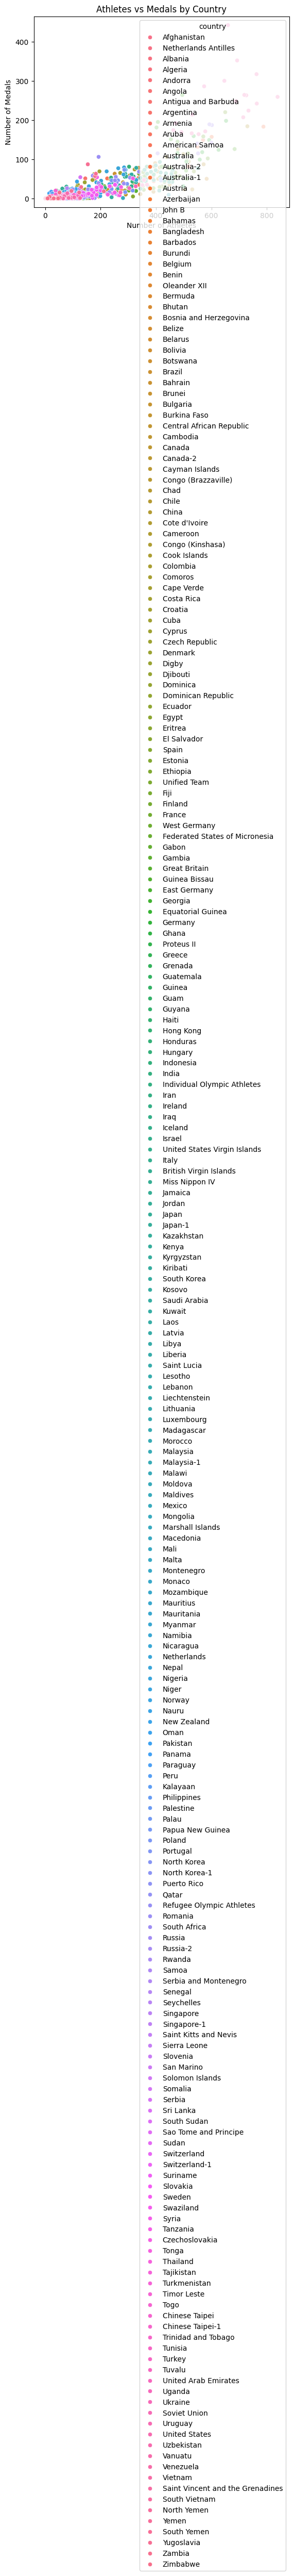

In [73]:
sns.scatterplot(data=df, x='athletes', y='medals', hue='country')
plt.title('Athletes vs Medals by Country')
plt.xlabel('Number of Athletes')
plt.ylabel('Number of Medals')
plt.show()


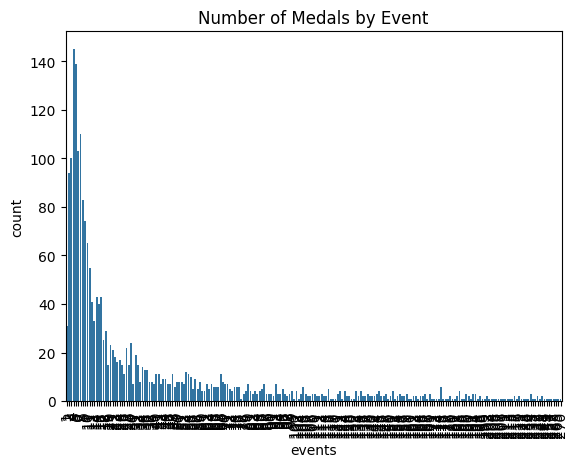

In [74]:
sns.countplot(data=df, x='events')
plt.title('Number of Medals by Event')
plt.xticks(rotation=90)
plt.show()


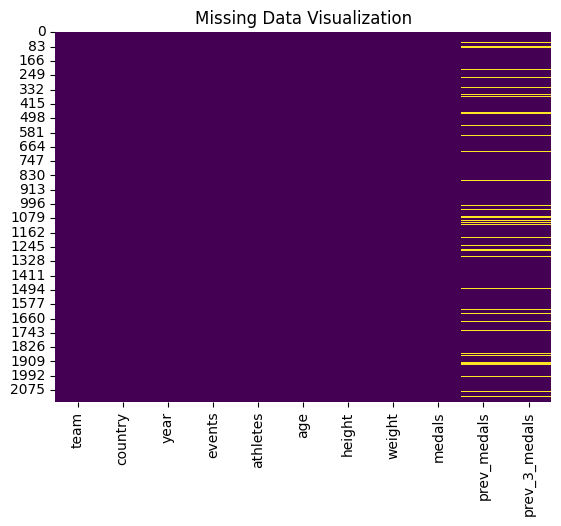

In [75]:
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title('Missing Data Visualization')
plt.show()


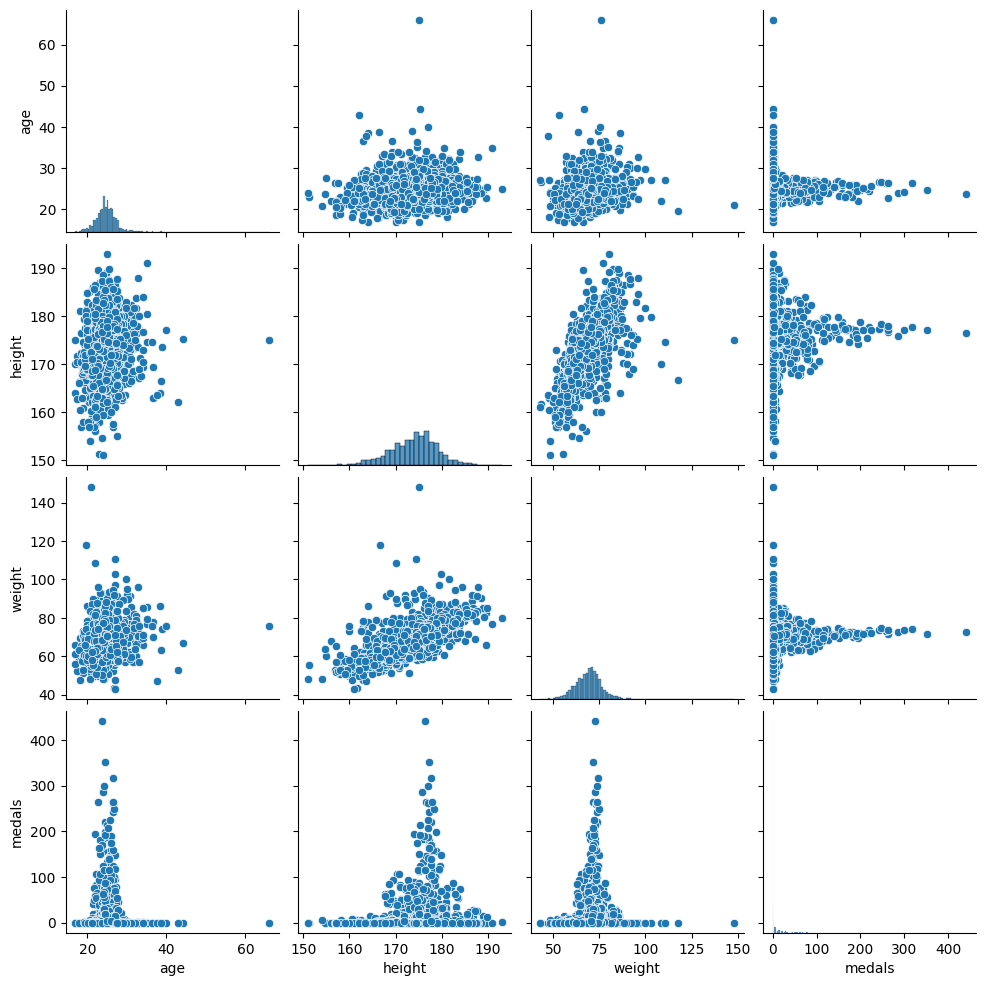

In [76]:
sns.pairplot(df[['age', 'height', 'weight', 'medals']])
plt.show()


In [77]:
# Filter the rows where either 'prev_medals' or 'prev_3_medals' has missing values
missing_values = df[df['prev_medals'].isnull() | df['prev_3_medals'].isnull()]

# Display only the 'country' column for those rows
missing_countries = missing_values['country'].unique()

# Show the result
print(missing_countries)
# Assign 0 to missing values in 'prev_medals' and 'prev_3_medals'
df['prev_medals'].fillna(0, inplace=True)
df['prev_3_medals'].fillna(0, inplace=True)

# Verify that the missing values have been replaced
print(df[['prev_medals', 'prev_3_medals']].isnull().sum())


['Albania' 'Algeria' 'Andorra' 'Angola' 'Antigua and Barbuda' 'Armenia'
 'Aruba' 'American Samoa' 'Azerbaijan' 'Bangladesh' 'Barbados' 'Burundi'
 'Benin' 'Bhutan' 'Bosnia and Herzegovina' 'Belize' 'Belarus' 'Bolivia'
 'Botswana' 'Bahrain' 'Brunei' 'Burkina Faso' 'Central African Republic'
 'Cambodia' 'Cayman Islands' 'Congo (Brazzaville)' 'Chad' "Cote d'Ivoire"
 'Cameroon' 'Congo (Kinshasa)' 'Cook Islands' 'Comoros' 'Cape Verde'
 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Eritrea' 'El Salvador' 'Unified Team'
 'West Germany' 'Federated States of Micronesia' 'Gabon' 'Gambia'
 'Guinea Bissau' 'East Germany' 'Georgia' 'Equatorial Guinea' 'Grenada'
 'Guinea' 'Guam' 'Honduras' 'Individual Olympic Athletes'
 'United States Virgin Islands' 'British Virgin Islands' 'Jordan'
 'Kazakhstan' 'Kyrgyzstan' 'Kiribati' 'Kosovo' 'Saudi Arabia' 'Kuwait'
 'Laos' 'Libya' 'Saint Lucia' 'Lesotho' 'Lithuania' 'Madagascar'
 'Malaysia' 'Malawi' 'Mold

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21272\965788222.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['prev_medals'].fillna(0, inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21272\965788222.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

# data preprocessing

In [78]:
df['prev_medals'].fillna(0, inplace=True)
df['prev_3_medals'].fillna(0, inplace=True)

# Verify that the missing values have been replaced
print(df[['prev_medals', 'prev_3_medals']].isnull().sum())


prev_medals      0
prev_3_medals    0
dtype: int64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21272\3605367828.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['prev_medals'].fillna(0, inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_21272\3605367828.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [79]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'team' column
df['team_encoded'] = label_encoder.fit_transform(df['team'])

# Verify the encoding
print(df[['team', 'team_encoded']].head())


  team  team_encoded
0  AFG             0
1  AFG             0
2  AFG             0
3  AFG             0
4  AFG             0


In [80]:
df

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals,team_encoded
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0,0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0,0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0,0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0,0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0,218
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0,218
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0,218
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3,218


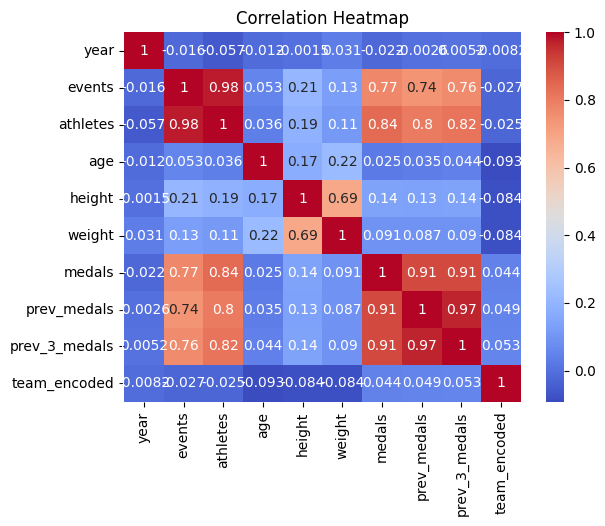

In [81]:
numeric_df = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

In [82]:
# Create Age Groups
# Create Age Groups (Fixing the label count)
age_bins = [0, 20, 30, 40, float('inf')]  # Define age bins
age_labels = ['under 20', '20-30', '30-40', '40+']  # Adjust labels to match bins
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# Create Weight Groups
weight_bins = [0, 68, 80, float('inf')]  # Define weight bins
weight_labels = ['under 68 kg', '68-80 kg', '80+ kg']  # Labels for each bin
df['weight_group'] = pd.cut(df['weight'], bins=weight_bins, labels=weight_labels, right=False)

# Create Height Groups (Corrected bins)
height_bins = [0, 170, 185, float('inf')]  # Define height bins
height_labels = ['under 170 cm', '170-185 cm', '185+ cm']  # Labels for each bin
df['height_group'] = pd.cut(df['height'], bins=height_bins, labels=height_labels, right=False)

# Verify the new columns
print(df[['age', 'age_group', 'weight', 'weight_group', 'height', 'height_group']].head())



    age age_group  weight weight_group  height  height_group
0  22.0     20-30    64.2  under 68 kg   161.0  under 170 cm
1  23.2     20-30    70.0     68-80 kg   170.2    170-185 cm
2  29.0     20-30    63.8  under 68 kg   168.3  under 170 cm
3  23.6     20-30    63.2  under 68 kg   168.4  under 170 cm
4  18.6  under 20    64.8  under 68 kg   170.8    170-185 cm


In [83]:
df

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals,team_encoded,age_group,weight_group,height_group
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0,0,20-30,under 68 kg,under 170 cm
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0,0,20-30,68-80 kg,170-185 cm
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0,0,20-30,under 68 kg,under 170 cm
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0,0,20-30,under 68 kg,under 170 cm
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0,0,under 20,under 68 kg,170-185 cm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0,218,20-30,68-80 kg,170-185 cm
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0,218,20-30,68-80 kg,170-185 cm
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0,218,20-30,under 68 kg,170-185 cm
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3,218,20-30,under 68 kg,170-185 cm


In [84]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'age_group' column
df['age_group_encoded'] = label_encoder.fit_transform(df['age_group'])

# Encode the 'weight_group' column
df['weight_group_encoded'] = label_encoder.fit_transform(df['weight_group'])

# Encode the 'height_group' column
df['height_group_encoded'] = label_encoder.fit_transform(df['height_group'])

# Verify the encoding
print(df[['age_group', 'age_group_encoded', 'weight_group', 'weight_group_encoded', 'height_group', 'height_group_encoded']].head())


  age_group  age_group_encoded weight_group  weight_group_encoded  \
0     20-30                  0  under 68 kg                     2   
1     20-30                  0     68-80 kg                     0   
2     20-30                  0  under 68 kg                     2   
3     20-30                  0  under 68 kg                     2   
4  under 20                  3  under 68 kg                     2   

   height_group  height_group_encoded  
0  under 170 cm                     2  
1    170-185 cm                     0  
2  under 170 cm                     2  
3  under 170 cm                     2  
4    170-185 cm                     0  


In [85]:
df

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals,team_encoded,age_group,weight_group,height_group,age_group_encoded,weight_group_encoded,height_group_encoded
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0,0,20-30,under 68 kg,under 170 cm,0,2,2
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0,0,20-30,68-80 kg,170-185 cm,0,0,0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0,0,20-30,under 68 kg,under 170 cm,0,2,2
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0,0,20-30,under 68 kg,under 170 cm,0,2,2
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0,0,under 20,under 68 kg,170-185 cm,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0,218,20-30,68-80 kg,170-185 cm,0,0,0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0,218,20-30,68-80 kg,170-185 cm,0,0,0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0,218,20-30,under 68 kg,170-185 cm,0,2,0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3,218,20-30,under 68 kg,170-185 cm,0,2,0


In [86]:
# Create a new column 'medals_per_athlete'
df['medals_per_athlete'] = df['medals'] / df['athletes']

# Verify the new column
print(df[['medals', 'athletes', 'medals_per_athlete']].head())


   medals  athletes  medals_per_athlete
0       0         8                 0.0
1       0         5                 0.0
2       0         8                 0.0
3       0        11                 0.0
4       0         5                 0.0


## normalisation

In [87]:
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [88]:

# 1. Normalize the features and the target
scaler = StandardScaler()

# Select the columns to normalize (features and target)
columns_to_normalize = ['year', 'events', 'athletes', 'age', 'height', 'weight', 
                        'prev_medals', 'prev_3_medals', 'team_encoded', 
                        'age_group_encoded', 'weight_group_encoded', 'height_group_encoded']

# Normalize the selected columns (features)
df_scaled = df.copy()
df_scaled[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Normalize the target column (medals)
target_scaler = StandardScaler()
df_scaled['medals'] = target_scaler.fit_transform(df[['medals']])

In [101]:
df_scaled

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals,team_encoded,age_group,weight_group,height_group,age_group_encoded,weight_group_encoded,height_group_encoded,medals_per_athlete
0,AFG,Afghanistan,-1.983501,-0.560338,-0.513718,-0.989561,-2.408504,-0.666900,-0.319694,-0.309991,-0.323397,-1.710260,20-30,under 68 kg,under 170 cm,-0.229503,1.163702,1.916840,0.000000
1,AFG,Afghanistan,-1.723433,-0.620970,-0.537178,-0.562196,-0.690842,0.095783,-0.319694,-0.309991,-0.323397,-1.710260,20-30,68-80 kg,170-185 cm,-0.229503,-0.919787,-0.537448,0.000000
2,AFG,Afghanistan,-1.463365,-0.560338,-0.513718,1.503402,-1.045577,-0.719499,-0.319694,-0.309991,-0.323397,-1.710260,20-30,under 68 kg,under 170 cm,-0.229503,1.163702,1.916840,0.000000
3,AFG,Afghanistan,-0.943230,-0.499706,-0.490258,-0.419741,-1.026907,-0.798397,-0.319694,-0.309991,-0.323397,-1.710260,20-30,under 68 kg,under 170 cm,-0.229503,1.163702,1.916840,0.000000
4,AFG,Afghanistan,0.617175,-0.620970,-0.537178,-2.200429,-0.578821,-0.588002,-0.319694,-0.309991,-0.323397,-1.710260,under 20,under 68 kg,170-185 cm,5.426286,1.163702,-0.537448,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,0.357108,-0.338020,-0.372959,0.078852,0.952139,0.240430,-0.319694,-0.309991,-0.323397,1.798544,20-30,68-80 kg,170-185 cm,-0.229503,-0.919787,-0.537448,0.000000
2140,ZIM,Zimbabwe,0.617175,-0.499706,-0.466798,0.114466,0.728096,0.161532,-0.228841,-0.309991,-0.323397,1.798544,20-30,68-80 kg,170-185 cm,-0.229503,-0.919787,-0.537448,0.214286
2141,ZIM,Zimbabwe,0.877243,-0.418863,-0.451158,0.470603,-0.373448,-0.732648,-0.198557,-0.213394,-0.286966,1.798544,20-30,under 68 kg,170-185 cm,-0.229503,1.163702,-0.537448,0.250000
2142,ZIM,Zimbabwe,1.137311,-0.560338,-0.505898,0.897968,0.093308,-0.535403,-0.319694,-0.181194,-0.239605,1.798544,20-30,under 68 kg,170-185 cm,-0.229503,1.163702,-0.537448,0.000000


In [103]:
# Select only the desired columns
selected_columns = ['year', 'events', 'athletes', 'age', 'height', 'weight', 'medals', 'prev_medals', 'prev_3_medals', 
                    'team_encoded', 'age_group_encoded', 'weight_group_encoded', 'height_group_encoded']

df_selected = df_scaled[selected_columns]

# Now, split the selected DataFrame into training and testing sets
from sklearn.model_selection import train_test_split

# Split the DataFrame into training (80%) and testing (20%) sets
train_df, test_df = train_test_split(df_selected, test_size=0.2, random_state=42)

# Verify the shapes of the split DataFrames
print(f"Training set size: {train_df.shape}")
print(f"Testing set size: {test_df.shape}")


Training set size: (1715, 13)
Testing set size: (429, 13)


In [104]:
import xgboost as xgb

# Initialize the model
model = xgb.XGBRegressor(random_state=42)

# Train the model
model.fit(train_df.drop('medals', axis=1), train_df['medals'])

# Make predictions
predictions = model.predict(test_df.drop('medals', axis=1))


In [105]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate predictions for the test set
predictions = model.predict(test_df.drop('medals', axis=1))

# Evaluate the model
mse = mean_squared_error(test_df['medals'], predictions)
r2 = r2_score(test_df['medals'], predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.09313689797276165
R-squared: 0.9073855398781999


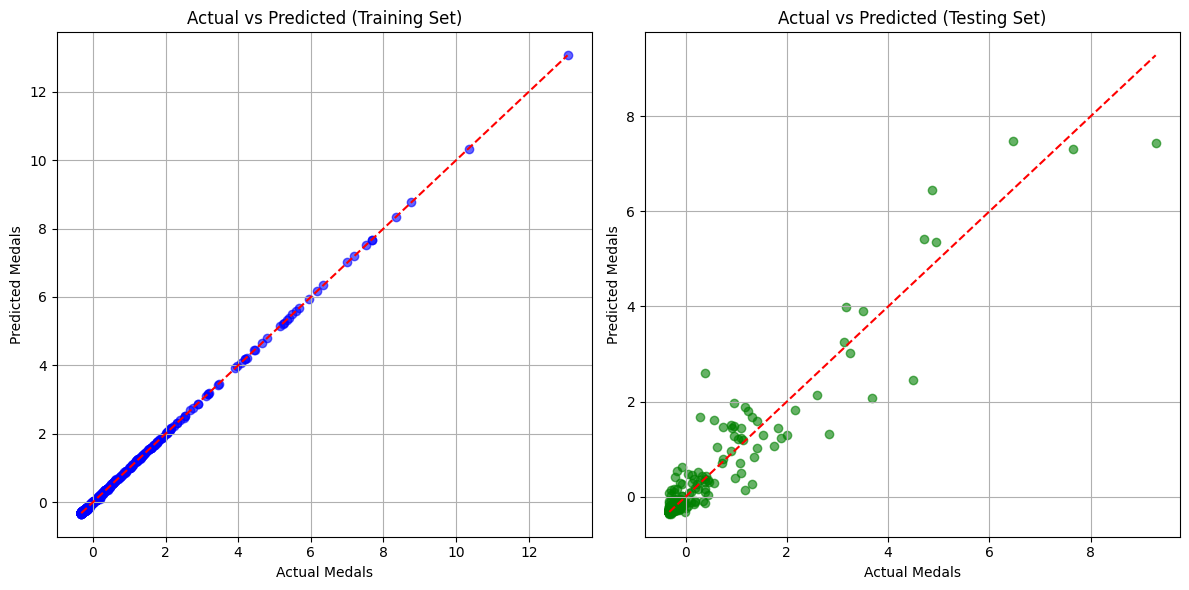

In [106]:
import matplotlib.pyplot as plt

# Make predictions on the training and testing sets
train_predictions = model.predict(train_df.drop('medals', axis=1))
test_predictions = model.predict(test_df.drop('medals', axis=1))

# Plot Actual vs Predicted for Training Set
plt.figure(figsize=(12, 6))

# Plot for training set
plt.subplot(1, 2, 1)
plt.scatter(train_df['medals'], train_predictions, color='blue', alpha=0.6)
plt.plot([train_df['medals'].min(), train_df['medals'].max()], 
         [train_df['medals'].min(), train_df['medals'].max()], color='red', linestyle='--')
plt.title('Actual vs Predicted (Training Set)')
plt.xlabel('Actual Medals')
plt.ylabel('Predicted Medals')
plt.grid(True)

# Plot Actual vs Predicted for Testing Set
plt.subplot(1, 2, 2)
plt.scatter(test_df['medals'], test_predictions, color='green', alpha=0.6)
plt.plot([test_df['medals'].min(), test_df['medals'].max()], 
         [test_df['medals'].min(), test_df['medals'].max()], color='red', linestyle='--')
plt.title('Actual vs Predicted (Testing Set)')
plt.xlabel('Actual Medals')
plt.ylabel('Predicted Medals')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


In [107]:
# Add the predicted values to the training and testing DataFrames
train_df['predicted_medals'] = train_predictions
test_df['predicted_medals'] = test_predictions

# Display the actual and predicted values for the training set
print("Training Set - Actual vs Predicted:")
print(train_df[['medals', 'predicted_medals']].head())

# Display the actual and predicted values for the testing set
print("\nTesting Set - Actual vs Predicted:")
print(test_df[['medals', 'predicted_medals']].head())


Training Set - Actual vs Predicted:
        medals  predicted_medals
1970 -0.319694         -0.321781
163  -0.319694         -0.317663
203  -0.319694         -0.321347
840  -0.319694         -0.322486
994   0.800824          0.795631

Testing Set - Actual vs Predicted:
        medals  predicted_medals
1344 -0.319694         -0.320220
1934 -0.319694         -0.281295
128  -0.228841         -0.193816
332  -0.319694         -0.319108
1163 -0.319694         -0.315672


In [108]:
test_df[['medals', 'predicted_medals']]

,medals,predicted_medals
1344,-0.319694,-0.320220
1934,-0.319694,-0.281295
128,-0.228841,-0.193816
332,-0.319694,-0.319108
1163,-0.319694,-0.315672
...,...,...
544,-0.319694,-0.317005
1200,-0.319694,-0.317048
508,0.104286,0.109139
1332,-0.319694,-0.318913


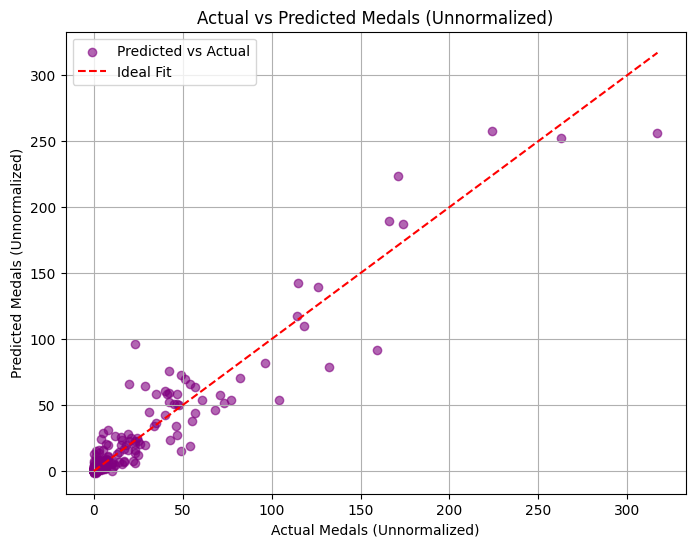

Testing Set - Unnormalized Actual vs Predicted:
      medals_original  predicted_medals_original
1344              0.0                  -0.017364
1934              0.0                   1.267960
128               3.0                   4.156542
332               0.0                   0.019343
1163              0.0                   0.132813
...               ...                        ...
544               0.0                   0.088779
1200              0.0                   0.087366
508              14.0                  14.160242
1332              0.0                   0.025803
2044            171.0                 223.383286

[429 rows x 2 columns]


In [113]:
# Inverse transform the normalized medals values to get the original scale
test_df['medals_original'] = target_scaler.inverse_transform(test_df['medals'].values.reshape(-1, 1))
test_df['predicted_medals_original'] = target_scaler.inverse_transform(test_df['predicted_medals'].values.reshape(-1, 1))

# Plot Actual vs Predicted (Unnormalized) for Testing Set
plt.figure(figsize=(8, 6))
plt.scatter(test_df['medals_original'], test_df['predicted_medals_original'], color='purple', alpha=0.6, label='Predicted vs Actual')
plt.plot([test_df['medals_original'].min(), test_df['medals_original'].max()], 
         [test_df['medals_original'].min(), test_df['medals_original'].max()], color='red', linestyle='--', label='Ideal Fit')
plt.title('Actual vs Predicted Medals (Unnormalized)')
plt.xlabel('Actual Medals (Unnormalized)')
plt.ylabel('Predicted Medals (Unnormalized)')
plt.legend()
plt.grid(True)
plt.show()

# Display the unnormalized actual and predicted values
print("Testing Set - Unnormalized Actual vs Predicted:")
print(test_df[['medals_original', 'predicted_medals_original']])


In [44]:
from sklearn.svm import SVR

# Initialize the model
model = SVR()

# Train the model
model.fit(train_df.drop('medals', axis=1), train_df['medals'])

# Make predictions
predictions = model.predict(test_df.drop('medals', axis=1))


In [45]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate predictions for the test set
predictions = model.predict(test_df.drop('medals', axis=1))

# Evaluate the model
mse = mean_squared_error(test_df['medals'], predictions)
r2 = r2_score(test_df['medals'], predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 837.6927060257493
R-squared: 0.23603042254085427


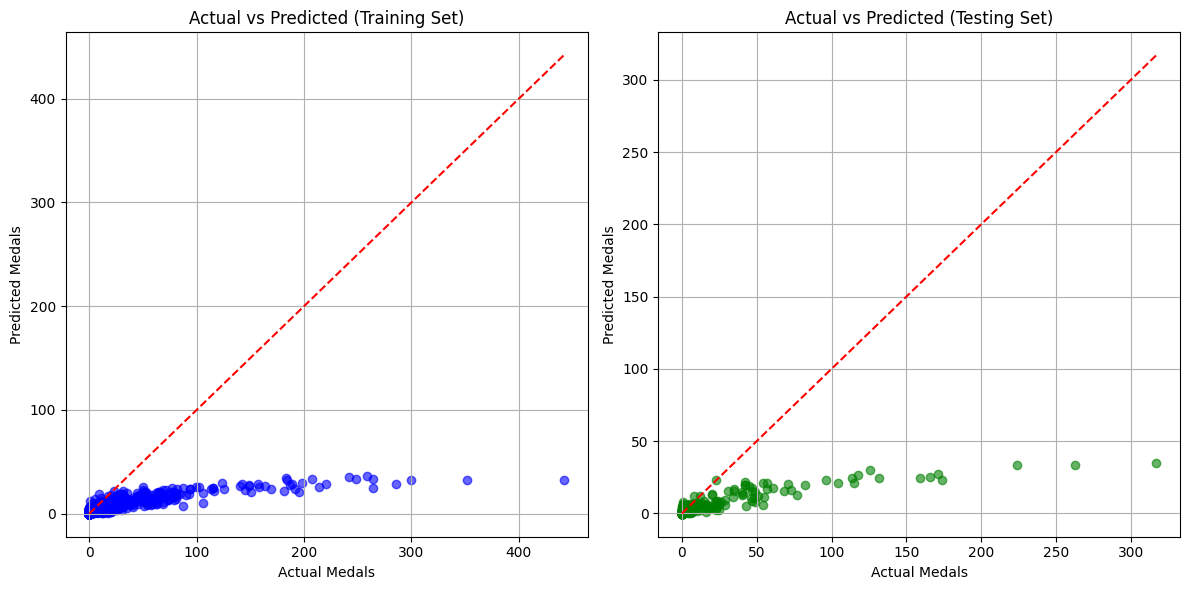

In [46]:
import matplotlib.pyplot as plt

# Make predictions on the training and testing sets
train_predictions = model.predict(train_df.drop('medals', axis=1))
test_predictions = model.predict(test_df.drop('medals', axis=1))

# Plot Actual vs Predicted for Training Set
plt.figure(figsize=(12, 6))

# Plot for training set
plt.subplot(1, 2, 1)
plt.scatter(train_df['medals'], train_predictions, color='blue', alpha=0.6)
plt.plot([train_df['medals'].min(), train_df['medals'].max()], 
         [train_df['medals'].min(), train_df['medals'].max()], color='red', linestyle='--')
plt.title('Actual vs Predicted (Training Set)')
plt.xlabel('Actual Medals')
plt.ylabel('Predicted Medals')
plt.grid(True)

# Plot Actual vs Predicted for Testing Set
plt.subplot(1, 2, 2)
plt.scatter(test_df['medals'], test_predictions, color='green', alpha=0.6)
plt.plot([test_df['medals'].min(), test_df['medals'].max()], 
         [test_df['medals'].min(), test_df['medals'].max()], color='red', linestyle='--')
plt.title('Actual vs Predicted (Testing Set)')
plt.xlabel('Actual Medals')
plt.ylabel('Predicted Medals')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


In [47]:
# Add the predicted values to the training and testing DataFrames
train_df['predicted_medals'] = train_predictions
test_df['predicted_medals'] = test_predictions

# Display the actual and predicted values for the training set
print("Training Set - Actual vs Predicted:")
print(train_df[['medals', 'predicted_medals']].head())

# Display the actual and predicted values for the testing set
print("\nTesting Set - Actual vs Predicted:")
print(test_df[['medals', 'predicted_medals']].head())

Training Set - Actual vs Predicted:
      medals  predicted_medals
1970       0          0.382289
163        0          0.942811
203        0         -0.014334
840        0          0.071029
994       37          9.221415

Testing Set - Actual vs Predicted:
      medals  predicted_medals
1344       0         -0.085296
1934       0          0.133646
128        3          4.135537
332        0         -0.066112
1163       0          0.171330


In [48]:
test_df[['medals', 'predicted_medals']]

,medals,predicted_medals
1344,0,-0.085296
1934,0,0.133646
128,3,4.135537
332,0,-0.066112
1163,0,0.171330
...,...,...
544,0,-0.172673
1200,0,0.115622
508,14,6.141497
1332,0,-0.016120
